In [1]:
# DO NOT EDIT

# Notebook configs
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# GML Mini-Challenge 3 - HS 2024

**Ausgabe:** Montag, 9. Dezember 2024

**Abgabe:**  Sonntag, 12. Januar 2025, 23:59 Uhr


## Vorgaben zu Umsetzung und Abgabe

- Die Algorithmen müssen auf der Basis von Array Operationen selber implementiert werden.
- Der Code muss lauffähig sein bei Ausführung im Docker-Container zum Repo oder auf JHub. 
- Es darf kein Code ausgelagert werden, i.e. sämtlicher Code muss sich im Notebook befinden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Überschrift, Colorbar, ..), so dass der Plot ohne den Code zu konsultieren, verstanden werden kann.
- Zu jedem Plot gehört eine kurze Diskussion, welche den Plot erklärt und die wichtigsten Einsichten, die damit sichtbar werden, festhält.  
- Als **Abgabe** zählt der letzte Commit vor Abgabetermin in in Ihrem Fork des Repos.  
- **Bitte lösche, dupliziere (splitte!) und verschiebe die vorhandenen Zellen nicht**. Dies führt zu Problemen bei der Korrektur. Du darfst aber beliebig viele weitere Zellen hinzufügen.
- Laufzeit vom Notebook: Das Notebook sollte in weniger als 30 Minuten ausgeführt werden können.

Für die Erarbeitung der Lösung darf unter Studierenden zusammengearbeitet werden. Die Zusammenarbeit ist dabei aber auf konzeptionelle und algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text von anderen oder vom Internet kopiert werden.**

**Bei der Defense am Ende des Semesters werden wir deinen Code betrachten und besprechen. Überlege dir, welche Zeilen du kommentieren möchtest, damit du bei der Defense einfach rekunstrieren kannst, was dir bei der Umsetzung überlegt hast.**


### Module

Neben den Python-Basismodulen darst du die folgenden Module immer benutzen: `numpy`, `pandas`, `matplotlib`, `seaborn`.

Du darfst auch generell [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing), [`sklearn.model_selection`](https://scikit-learn.org/stable/model_selection.html) und [`sklearn.compose`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose) benutzen.

Zusätzliche Module darfst du nur verwenden wenn ausdrücklich erwähnt oder bereits vorgegeben in der Code-Cell.

## Bewertung

Bewertet wird:

- Vollständigkeit (Code, Text)
- Korrektheit (Code, Text)
- Implementation (z.B. Vektorisierung der Operationen, Scikit-Learn API, Visualisierungen, Lesbarkeit Code/Output)

## Einleitung

Daniele arbeitet bei einem grossen Schweizer TV-Anbieter und hat erfahren, dass du mit Machine-Learning echten Mehrwert liefern können. Daniele hat den Auftrag bekommen Film-Empfehlungen für Kunden zu erstellen, damit die Kunden bessere Vorschläge bekommen und das neue Streaming-Angebot nutzen. Das Management möchte, dass Daniele mit modernen Machine-Learning Ansätzen arbeitet und diese evaluiert. Insbesondere soll [_collaborative filtering_](https://en.wikipedia.org/wiki/Collaborative_filtering) ausprobiert werden, wobei Kunden mit ähnlichen Präferenzen gefunden werden um dann gemeinsam (_collaborative_) Empfehlungen generieren zu können. 

Du findest im [ Coursera-Kurs ](https://www.coursera.org/learn/unsupervised-learning-recommenders-reinforcement-learning) von Andrew Ng eine gute Einführung in Collaborative Filtering.

Das Modell soll in Echtzeit, also sobald neue _Ratings_ verfügbar sind, aktualisiert werden können. Deshalb hat man entschieden einen Ansatz zu wählen mit dem man mit _Stochastic Gradient Descent (SGD)_ das Modell mit einzelnen Beobachtungen anpassen (trainieren) kann. Das wäre auch in Echtzeit aktualisierbar.

In einem ersten Schritt soll mit öffentlich verfügbaren Daten ein Modell erstellt und getestet werden um zu beurteilen, ob sich weitere Investments in Empfehlungssysteme lohnen. Du sollst Daniele dabei unterstützen und auf dem bekannten [_MovieLens_](https://movielens.org/) Datensatz einen Prototyp erstellen.



## Ziel

Unser Ziel ist es, mit Unsupervised Learning-Ansätzen die Frage zu beantworten ob es möglich ist sinnvolle Empfehlungen zu generieren.

## Aufgabe 1 (8 Punkte)

In dieser Aufgabe geht es darum die Daten einzulesen, kennenzulernen und für die Modellierung vorzubereiten.



### Aufgabe 1a

Lese die Datensätze `movies.csv` und `ratings.csv` ein.

Charakterisiere die Datensätze indem du folgende Aufgaben erledigst, bzw. Fragen beantwortest. Nur die Beantwortung der folgenden Fragen wird bewertet:

1. Beschreibe die Datensätze kurz in Worten: Was ist jeweils der Inhalt und wie hängen die beiden Datensätze zusammen?
2. Erstelle die Rating-Matrix $R$ mit dem bereitgestellten Code `create_rating_matrix`. $R$ hat die Dimensionalität $R \in \mathbb{R}^{N_u  x N_i}$, wobei $N_u$ die Anzahl Users sind und $N_i$ die Anzahl Filme (Items). Der Eintrag $r_{u,i}$ indexiert das Rating von User $u$ für den Film $i$ in $R$. Verifiziere, dass die Anzahl Zeilen und die Anzahl Spalten stimmen.
3. Was ist die _Sparsity_ von $R$?
4. Zeige anhand von $R$ die Verteilung über die Ratings und beschreibe diese mit Worten.
5. Zeige anhand von $R$ die Verteilung über jeweils die mittleren User- und die mittleren Movie Ratings.
6. Welcher Film wurde am besten, welcher am schlechtesten bewertet?
7. Untersuche den Zusammenhang von "imdbRating" / "imdbVotes" und den bereitgestellten Ratings in `ratings.csv`.
8. Finde je einen Film und einen User welche "extrem" sind (bzw. mögliche Anomalien sind). Du kannst das selber, sinnvoll, definieren.


Du kannst die Fragen mit Code beantworten (mit Grafiken und/oder Print-Statements). Referenziere klar auf die Fragennummer. Beispiel:

```
print("1) Die Datensätze...")
print(f"3) Die Sparsity beträgt: {sparsity:.3f}")
```

Du kannst auch eine zusätzliche Text-Zelle einfügen und Fragen so beantworten.

In [2]:
from typing import Dict, Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def create_rating_matrix(df: pd.DataFrame) -> (np.ndarray, Dict[int, int], Dict[int, int]):
    """Create Ratings Matrix and Mapping Tables. 
        
        Args:
            df: pd.DataFrame with columns [movieId, userId, rating]
    
        Returns:
                Ratings-Matrix (np.ndarray),
                Column-No to Movie-ID Mapper (Dict[column_number, movieId]),
                Row-No to User-ID Mapper (Dict[row_number, userId])

        Remark:
            Zero-Entries in Ratings-Matrix are missing / non-existing ratings
    """
    # Mapping Tables
    map_movie_to_id = {k:i for i, k in enumerate(df['movieId'].unique())}
    map_user_to_id = {k:i for i, k in enumerate(df['userId'].unique())}
    
    map_col_id_to_movie = {v: k for k, v in map_movie_to_id.items()}
    map_row_id_to_user_id = {v: k for k, v in map_user_to_id.items()}

    mapped_user_id = df['userId'].map(map_user_to_id)
    mapped_movie_id = df['movieId'].map(map_movie_to_id)
    
    # Create Ratings Matrix
    from scipy.sparse import csc_matrix
    ratings = csc_matrix(
        (df['rating'], (mapped_user_id, mapped_movie_id)),
        shape=(len(map_user_to_id.keys()), 
               len(map_movie_to_id.keys()))).toarray()

    return ratings, map_col_id_to_movie, map_row_id_to_user_id


movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

print("1) Der Datensatz movies enthält alle Informationen über den Film, sowie die Ratings und Anzahl der imdb. \n")
print("Jeder Film hat eine eindeutige Kennung *movieId*. \n")
print("Der Datensatz ratings enthält die Ratings der User zu den Filmen. \n")
print("Die beiden Datensätze hängen über die Spalte 'movieId' zusammen, d.h. man kann über 'movieId' die Filmtitel und weitere Metadaten aus 'movies.csv' mit den User-Bewertungen aus 'ratings.csv' verknüpfen. \n")

# Prüfen der Dimensionen
ratings_matrix, map_col_id_to_movie, map_row_id_to_user_id = create_rating_matrix(ratings)
num_users, num_items = ratings_matrix.shape
print(f"2) Die Dimensionen der Rating-Matrix R sind: {ratings_matrix.shape}")
print(f"   -> #Users (Zeilen) = {num_users}, #Items (Spalten) = {num_items} \n")

# Sparsity
num_nonzeros = np.count_nonzero(ratings_matrix)
total_entries = ratings_matrix.size
density = num_nonzeros / total_entries
sparsity = 1 - density

print(f"3) Bewertete Einträge: {num_nonzeros}")
print(f"   Gesamte Einträge: {total_entries}")
print(f"   Sparsity (Anteil 0-Einträge): {sparsity:.3f}")


1) Der Datensatz movies enthält alle Informationen über den Film, sowie die Ratings und Anzahl der imdb. 

Jeder Film hat eine eindeutige Kennung *movieId*. 

Der Datensatz ratings enthält die Ratings der User zu den Filmen. 

Die beiden Datensätze hängen über die Spalte 'movieId' zusammen, d.h. man kann über 'movieId' die Filmtitel und weitere Metadaten aus 'movies.csv' mit den User-Bewertungen aus 'ratings.csv' verknüpfen. 

2) Die Dimensionen der Rating-Matrix R sind: (610, 3647)
   -> #Users (Zeilen) = 610, #Items (Spalten) = 3647 

3) Bewertete Einträge: 90227
   Gesamte Einträge: 2224670
   Sparsity (Anteil 0-Einträge): 0.959


<Figure size 600x400 with 0 Axes>

<Axes: ylabel='Count'>

Text(0.5, 0, 'Rating-Wert')

Text(0, 0.5, 'Häufigkeit')

Text(0.5, 1.0, 'Verteilung der vorhandenen Rating-Werte')

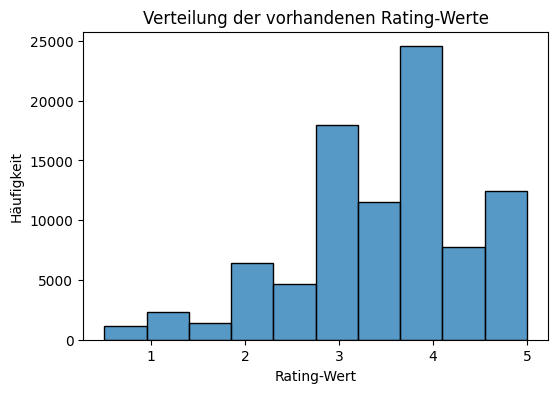

4) Beschreibung der Rating-Verteilung:
count    90227.000000
mean         3.537262
std          1.029760
min          0.500000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
dtype: float64
Es gibt sehr viele 4-Sterne-Bewertungen, gefolgt von 3-Sterne-Bewertungen. Niedrige Bewertungen kommen nicht so häufig vor. 



In [3]:
# Alle tatsächlichen Rating-Werte (ohne Nullwerte)
all_ratings = ratings_matrix[ratings_matrix > 0].flatten()

plt.figure(figsize=(6,4))
sns.histplot(all_ratings, bins=10, kde=False)
plt.xlabel("Rating-Wert")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der vorhandenen Rating-Werte")
plt.show()

print("4) Beschreibung der Rating-Verteilung:")
print(pd.Series(all_ratings).describe())
print("Es gibt sehr viele 4-Sterne-Bewertungen, gefolgt von 3-Sterne-Bewertungen. Niedrige Bewertungen kommen nicht so häufig vor. \n")

<Axes: ylabel='Count'>

Text(0.5, 1.0, 'Verteilung mittl. User-Ratings')

Text(0.5, 0, 'Durchschnitts-Rating pro User')

<Axes: ylabel='Count'>

Text(0.5, 1.0, 'Verteilung mittl. Movie-Ratings')

Text(0.5, 0, 'Durchschnitts-Rating pro Film')

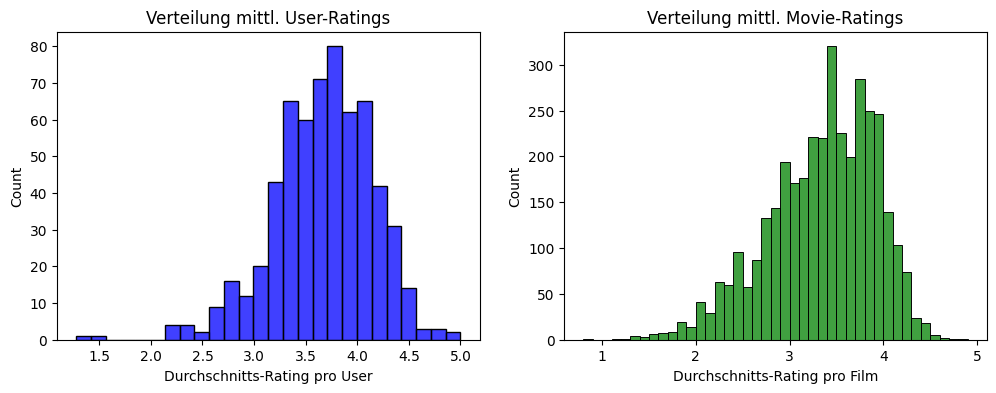

5) Kurze Beschreibung:
   Mittleres (mean) User-Rating (über alle User gemittelt): 3.668
   Mittleres (mean) Movie-Rating (über alle Filme gemittelt): 3.349


In [4]:
# Durchschnitt pro User
user_means = []
for u in range(num_users):
    user_ratings = ratings_matrix[u, :]
    user_ratings_nonzero = user_ratings[user_ratings > 0]
    if len(user_ratings_nonzero) > 0:
        user_means.append(np.mean(user_ratings_nonzero))
    else:
        user_means.append(np.nan)

# Durchschnitt pro Film
movie_means = []
for i in range(num_items):
    movie_ratings = ratings_matrix[:, i]
    movie_ratings_nonzero = movie_ratings[movie_ratings > 0]
    if len(movie_ratings_nonzero) > 0:
        movie_means.append(np.mean(movie_ratings_nonzero))
    else:
        movie_means.append(np.nan)

# Plotten
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.histplot([x for x in user_means if not np.isnan(x)], kde=False, ax=ax[0], color='blue')
ax[0].set_title("Verteilung mittl. User-Ratings")
ax[0].set_xlabel("Durchschnitts-Rating pro User")

sns.histplot([x for x in movie_means if not np.isnan(x)], kde=False, ax=ax[1], color='green')
ax[1].set_title("Verteilung mittl. Movie-Ratings")
ax[1].set_xlabel("Durchschnitts-Rating pro Film")

plt.show()

print("5) Kurze Beschreibung:")
print(f"   Mittleres (mean) User-Rating (über alle User gemittelt): {np.nanmean(user_means):.3f}")
print(f"   Mittleres (mean) Movie-Rating (über alle Filme gemittelt): {np.nanmean(movie_means):.3f}")


In [ ]:
# Welcher Film wurde am besten und schlechten bewertet
best_movie_id = np.nanargmax(movie_means)
worst_movie_id = np.nanargmin(movie_means)

print(f"6) Der Film mit der besten Bewertung ist: {movies[movies['movieId'] == map_col_id_to_movie[best_movie_id]]['title'].values[0]}")
print(f"   -> Durchschnittliche Bewertung: {movie_means[best_movie_id]:.3f} \n")

print(f"   Der Film mit der schlechtesten Bewertung ist: {movies[movies['movieId'] == map_col_id_to_movie[worst_movie_id]]['title'].values[0]}")
print(f"   -> Durchschnittliche Bewertung: {movie_means[worst_movie_id]:.3f}")

6) Der Film mit der besten Bewertung ist: The Trial
   -> Durchschnittliche Bewertung: 4.900 

   Der Film mit der schlechtesten Bewertung ist: Police Academy: Mission to Moscow
   -> Durchschnittliche Bewertung: 0.800


<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 0, 'IMDB Rating')

Text(0, 0.5, 'Durchschnittliches Movie-Rating')

Text(0.5, 1.0, "Zusammenhang 'IMDB Rating' und Ratings")

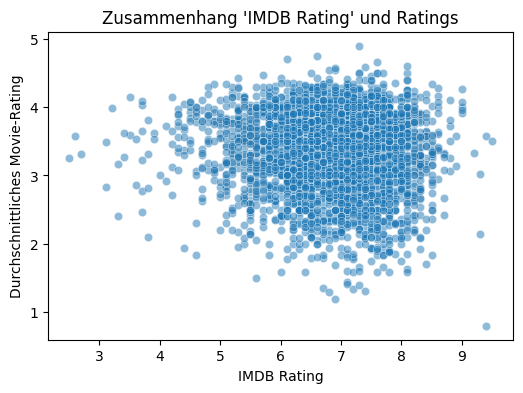

7) Es ist einr leichte Tendenz zu erkennen, Filme welche bei den Ratings gut bewertet wurde, wurde auch bei den IMDB Ratings eher gut bewertet. Dennoch ist die Verteilung sehr gestreut.



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 0, 'IMDB Votes')

Text(0, 0.5, 'Durchschnittliches Movie-Rating')

Text(0.5, 1.0, "Zusammenhang 'IMDB Votes' und Ratings")

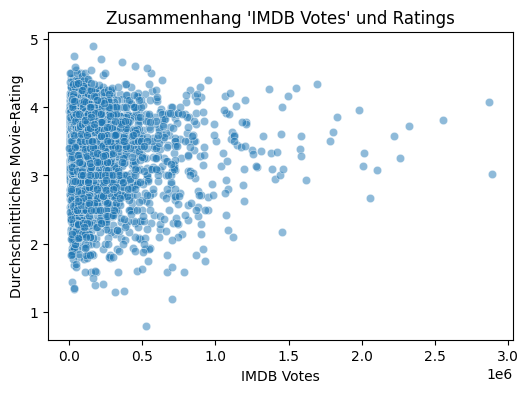

Man erkennt hier sehr gut, dass die meisten Filme nur wenige Bewertungen haben. Auch hier ist die Verteilung sehr gestreut, dennoch haben die Filme mit 3+ Sternen mehr Votes.



In [6]:
# Zusammenhang "imdbRating" und Ratings
imdb_ratings = movies['imdbRating'].values
imdb_ratings = imdb_ratings[~np.isnan(imdb_ratings)]

plt.figure(figsize=(6,4))
sns.scatterplot(x=imdb_ratings, y=movie_means, alpha=0.5)
plt.xlabel("IMDB Rating")
plt.ylabel("Durchschnittliches Movie-Rating")
plt.title("Zusammenhang 'IMDB Rating' und Ratings")
plt.show()

print("7) Es ist einr leichte Tendenz zu erkennen, Filme welche bei den Ratings gut bewertet wurde, wurde auch bei den IMDB Ratings eher gut bewertet. Dennoch ist die Verteilung sehr gestreut.\n")

# Zusammenhang "imdbVotes" und Ratings
imdb_votes = movies['imdbVotes'].values
imdb_votes = imdb_votes[~np.isnan(imdb_votes)]

plt.figure(figsize=(6,4))
sns.scatterplot(x=imdb_votes, y=movie_means, alpha=0.5)
plt.xlabel("IMDB Votes")
plt.ylabel("Durchschnittliches Movie-Rating")
plt.title("Zusammenhang 'IMDB Votes' und Ratings")
plt.show()

print("Man erkennt hier sehr gut, dass die meisten Filme nur wenige Bewertungen haben. Auch hier ist die Verteilung sehr gestreut, dennoch haben die Filme mit 3+ Sternen mehr Votes.\n")

In [7]:
# ein extremer User und Film --> User oder Filme welche nur 4.5+ Sterne vergeben haben
extreme_users_high = []
for u in range(num_users):
    u_ratings = ratings_matrix[u, :]
    non_zero = u_ratings[u_ratings > 0]
    if len(non_zero) > 0 and np.all(non_zero >= 4.5):
        extreme_users_high.append(u)

print(f"8) Anzahl User, die (fast) nur hohe Bewertungen vergeben haben: {len(extreme_users_high)}")

# Wie viele Ratings hat jeder dieser User abgegeben
for user_idx in extreme_users_high:
    user_id = map_row_id_to_user_id[user_idx]
    total_ratings = np.count_nonzero(ratings_matrix[user_idx, :])
    print(f"UserIndex={user_idx}, userId={user_id} hat insgesamt {total_ratings} Bewertungen abgegeben. \n")

extreme_movies_high = []
for i in range(num_items):
    col_data = ratings_matrix[:, i]
    non_zero = col_data[col_data > 0]
    if len(non_zero) > 0 and np.all(non_zero >= 4.5):
        extreme_movies_high.append(i)

print(f"Anzahl Filme, die (fast) nur hohe Bewertungen >=4.5 bekommen haben: {len(extreme_movies_high)}")

for movie_idx in extreme_movies_high:
    movie_id = map_col_id_to_movie[movie_idx]
    total_ratings = np.count_nonzero(ratings_matrix[:, movie_idx])
    print(f"FilmIndex={movie_idx}, movieId={movie_id} hat insgesamt {total_ratings} Bewertungen.")


8) Anzahl User, die (fast) nur hohe Bewertungen vergeben haben: 1
UserIndex=52, userId=53 hat insgesamt 20 Bewertungen abgegeben. 

Anzahl Filme, die (fast) nur hohe Bewertungen >=4.5 bekommen haben: 3
FilmIndex=1247, movieId=177593 hat insgesamt 8 Bewertungen.
FilmIndex=2467, movieId=6460 hat insgesamt 5 Bewertungen.
FilmIndex=2507, movieId=158966 hat insgesamt 5 Bewertungen.


## Aufgabe 2 (21 Punkte)

In dieser Aufgabe implementierst du einen Sklearn-Estimator um ein Modell der Daten zu fitten mit dem Empfehlungen generiert werden können.


### Aufgabe 2a

Du möchtest eine Rating Matrix $R$ in zwei Matrizen $U \in \mathbb{R}^{N_u \times K}$ (User-Faktoren) und $M \in \mathbb{R}^{N_i \times K}$ (Movie-Faktoren) faktorisieren. Die Faktorisierung $\hat{R}$ soll $R$ möglichst gut approximieren im Sinne des quadrierten Fehlers. $K$ sind die Anzahl Faktoren.

Die Gleichung sieht folgendermassen aus und enthält zusätzlich noch Bias-Vektoren.

\begin{align}
R \approx \hat{R} = UM^T + \mathbf{b_u} + \mathbf{b_m}^T + \overline{r}
\end{align}

$R$ hat die Dimensionalität $R \in \mathbb{R}^{N_u \times N_i}$, wobei $N_u$ die Anzahl Users sind und $N_i$ die Anzahl Items. $\mathbf{b}_u \in \mathbb{R}^{N_u}$ ist ein User-Bias Vektor, $\mathbf{b}_m \in \mathbb{R}^{N_i}$ ein Item-Bias Vektor, und $\overline{r}$ das globale Durchschnittsrating (die Bias-Vektoren müssen mit _broadcasting_ addiert werden). 

Die Hoffnung ist, dass $\hat{R}$ dort wo $R$ keine Einträge hat (da die Matrix $R$ relativ sparse ist), realistische Einträge erzeugt, die für Empfehlungen genutzt werden können.

Wir möchten den quadrierten Fehler zwischen $\hat{R}$ und $R$ minimieren. Zusätzlich möchten wir mit einer Regularisierung ($\Omega$) Overfitting verhindern. Dazu definieren wir folgende Kostenfunktion:

\begin{align}
J(U, M, \mathbf{b_u},\mathbf{b_m}) &= \frac{1}{| \mathbb{Z} |} \Big(\sum_{u, i \in \mathbb{Z}} \frac{1}{2}(r^{(u,i)} - \hat{r}^{(u,i)})^2 + \sum_{u, i \in \mathbb{Z}} \Omega^{(u, i)} \Big)
\end{align}

Wobei:

\begin{align}
\hat{r}^{(u,i)} &= \mathbf{u}^{(u)T} \mathbf{m}^{(i)} + b_u^{(u)} + b_m^{(i)} \\
\Omega^{(u, i)} &= \frac{\lambda}{2} \Big( \lVert \mathbf{u}^{(u)} \rVert^2_2 +  \lVert \mathbf{m}^{(i)} \rVert^2_2 + b_u^{(u)2} + b_m^{(i)2} \Big)
\end{align}

$\mathbb{Z}$ ist das Set der bekannten/nicht-null Einträge der Rating-Matrix $R$ (alle Kombinationen von $(u,r)$ die vorkommen). $\mathbf{u}^{(u)T}$ ist der $u$-te Zeilenvektor von $U$ und $\mathbf{m}^{(i)}$ der $i$-te Spaltenvektor von $M^T$. $\lambda$ ist der Regularisierungsfaktor. Das globale Durchschnittsrating $\overline{r}$ berechnen wir auf $R$ und ziehen das von allen Ratings ab. Wir führen die Optimisierung als auf $R_{\text{center}} = R - \overline{r}$ durch. Die quadrierte L-2 Norm ist folgendermassen definiert: $\lVert \mathbf{z} \rVert^2_2 = \sum_i (z^{(i)})^2$.

### Optimisierung mit Stochastic Gradient Descent (SGD)

Man optimiert die Kostenfunktion abwechselnd, mal für $\mathbf{u}^{(u)T}$ und dann für $\mathbf{m}^{(i)}$ (und die Biases), wobei man die andere Variable jeweils konstant hält. Das führt zu einem _least squares_ Optimisierungs-Problem. Mit _SGD_ approximiert man die Kostenfunktion (und deren Gradienten) mit einem per Sample-Loss $L$:

Mit $M$ fix:
\begin{align}
L(U, r^{(u,i)}) &= \frac{1}{2} (r^{(u,i)} - \hat{r}^{(u,i)})^2 + \Omega^{(u, i)} \\
J(U) &= \mathbb{E}_{u,i \sim \mathbb{Z}} L(U, r^{(u,i)}) = \frac{1}{| \mathbb{Z} |} \sum_{u, i \in \mathbb{Z}}  L(U, r^{(u,i)})
\end{align}

Mit $U$ fix:
\begin{align}
L(M, r^{(u,i)}) &= \frac{1}{2} (r^{(u,i)} - \hat{r}^{(u,i)})^2 + \Omega^{(u, i)} \\
J(M) &= \mathbb{E}_{u,i \sim \mathbb{Z}} L(M, r^{(u,i)}) = \frac{1}{| \mathbb{Z} |} \sum_{u, i \in \mathbb{Z}}  L(M, r^{(u,i)})
\end{align}

### Algorithmus

Wir optimieren die Kostenfunktion für jeden Eintrag in der Rating-Matrix $R$ mit folgendem Algorithmus. Wobei $\eta$ die _learning rate_ ist und $t$ den Iterationschritt indexiert.

For all $u, i \in \mathbb{Z}$ do:

\begin{align}
\mathbf{u}^{(u)}_{t+1} &= \mathbf{u}^{(u)}_{t} - \eta \frac{\partial L(U, r^{(u,i)})}{\partial \mathbf{u}^{(u)}_{t}} \\
\mathbf{m}^{(i)}_{t+1} &= \mathbf{m}^{(i)}_{t} - \eta \frac{\partial L(M, r^{(u,i)})}{\partial \mathbf{m}^{(i)}_{t}} \\
b_{m, t+1}^{(i)} &= b_{m, t}^{(i)} - \eta \frac{\partial L(U, r^{(u,i)})}{\partial b_{m, t}^{(i)}} \\
b_{u, t+1}^{(u)} &= b_{u, t}^{(u)} - \eta \frac{\partial L(U, r^{(u,i)})}{\partial b_{u, t}^{(u)}} \\
\end{align}

Repeat until _max epochs_ is reached.

### Implementation

Ergänze die Klasse `SparseMatrixFactorization`.


**Beachte:**

- In sklearn wird statt $\lambda$ jeweils $\alpha$ `alpha` als Bezeichnung für die Regularisierungsstärke verwendet (wohl weil `lambda` ein reserviertes Wort ist in Python).

- $n$ bezeichnet Anzahl Datenpunkte. Ausserdem: $w$ ist ein Skalar, $\mathbf{w}$ ein Vektor und $\mathbf{W}$ eine Matrix.

- Implementiere alles vektorisiert.



In [8]:
from typing import Self, Tuple
from sklearn.base import BaseEstimator
import numpy as np
from numpy.random import default_rng
from tqdm.notebook import tqdm

class SparseMatrixFactorization(BaseEstimator):
    def __init__(
        self,
        alpha: float,
        lr: float,
        num_components: int,
        num_epochs: int,
        random_seed: int = 123,
        verbose: bool = True,
        use_tqdm: bool = True
    ):
        """
        Initialize the SparseMatrixFactorization model.

        Parameters:
        -----------
        alpha (float): Regularization strength.
        lr (float): Learning rate for SGD.
        num_components (int): Number of latent factors.
        num_epochs (int): Number of epochs for training.
        random_seed (int): Random seed for reproducibility.
        verbose (bool): If True, print loss after each epoch.
        use_tqdm (bool): If True, show a tqdm progress bar for epochs.
        """
        self.alpha = alpha
        self.lr = lr
        self.num_components = num_components
        self.num_epochs = num_epochs
        self.random_seed = random_seed
        self.verbose = verbose
        self.use_tqdm = use_tqdm
        self.rng = np.random.default_rng(random_seed)

    def _initialize(self, R: np.ndarray) -> None:
        """
        Initializes user and item weights and biases.

        Parameters:
        -----------
        R (numpy.ndarray): Sparse rating matrix of shape (n_users, n_items).
        """
        self.n_users, self.n_items = R.shape
        self.global_mean = np.mean(R[R > 0])

        # Latent factor matrices
        self.U = self.rng.normal(scale=0.1, size=(self.n_users, self.num_components))
        self.M = self.rng.normal(scale=0.1, size=(self.n_items, self.num_components))

        # Biases
        self.b_u = np.zeros(self.n_users)
        self.b_m = np.zeros(self.n_items)

    def fit(self, R: np.ndarray) -> Self:
        """
        Train the model on the provided rating matrix R.

        Parameters:
        -----------
        R (numpy.ndarray): Sparse rating matrix of shape (n_users, n_items).

        Returns:
        --------
        Self
        """
        self._initialize(R)
        self.epoch_end_cost_ = []

        # Alle (u,i)-Paare, die tatsächlich ein Rating > 0 haben
        known_indices = np.argwhere(R > 0)

        if self.use_tqdm:
            epoch_iter = tqdm(range(self.num_epochs), desc="Training", unit="epoch")
        else:
            epoch_iter = range(self.num_epochs)

        for epoch in epoch_iter:
            # Shuffle, um die Update-Reihenfolge zufällig zu halten
            np.random.shuffle(known_indices)

            total_loss = 0.0
            squared_error_loss = 0.0
            regularization_loss = 0.0

            for u, i in known_indices:
                total_loss_step, squared_loss_step, reg_loss_step = self.take_one_step(R, (u, i))
                total_loss += total_loss_step
                squared_error_loss += squared_loss_step
                regularization_loss += reg_loss_step

            # Durchschnittliche Kosten (Loss) pro Rating-Eintrag
            avg_total = total_loss / len(known_indices)
            avg_sq_err = squared_error_loss / len(known_indices)
            avg_reg = regularization_loss / len(known_indices)

            self.epoch_end_cost_.append([avg_total, avg_sq_err, avg_reg])

            if self.verbose:
                print(f"Epoch {epoch + 1}/{self.num_epochs} | "
                      f"Total Loss: {avg_total:.4f} | "
                      f"Squared Loss: {avg_sq_err:.4f} | "
                      f"Reg Loss: {avg_reg:.4f}")

        return self

    def take_one_step(self, R: np.ndarray, rating: Tuple[int, int]) -> Tuple[float, float, float]:
        """
        Take one gradient descent step for a specific (user, item) pair.

        Parameters:
        -----------
        R (numpy.ndarray): Sparse rating matrix.
        rating (tuple): (u, i) specifying the user and item indices.

        Returns:
        --------
        Tuple of losses (total_loss, squared_loss, reg_loss).
        """
        u, i = rating
        r_ui = R[u, i]
        prediction = self.predict_single(u, i)
        error = r_ui - prediction

        dJ_dUser, dJ_dItem, dJ_dUserBias, dJ_dItemBias = self.calc_gradients(
            error, self.M[i, :], self.U[u, :], self.b_u[u], self.b_m[i]
        )

        # Parameter-Update
        self.U[u, :] += self.lr * dJ_dUser
        self.M[i, :] += self.lr * dJ_dItem
        self.b_u[u] += self.lr * dJ_dUserBias
        self.b_m[i] += self.lr * dJ_dItemBias

        # Verluste berechnen
        squared_loss = 0.5 * (error ** 2)
        reg_loss = 0.5 * self.alpha * (
            np.sum(self.U[u, :] ** 2)
            + np.sum(self.M[i, :] ** 2)
            + self.b_u[u] ** 2
            + self.b_m[i] ** 2
        )
        total_loss = squared_loss + reg_loss

        return total_loss, squared_loss, reg_loss

    def calc_gradients(
        self,
        error: float,
        m_item: np.ndarray,
        u_user: np.ndarray,
        bias_user: float,
        bias_item: float
    ) -> Tuple[np.ndarray, np.ndarray, float, float]:
        """
        Calculate the gradients for user and item latent vectors and biases.

        Parameters:
        -----------
        error (float): The difference (r_ui - prediction).
        m_item (np.ndarray): Item's latent factor vector.
        u_user (np.ndarray): User's latent factor vector.
        bias_user (float): User bias term.
        bias_item (float): Item bias term.

        Returns:
        --------
        (dJ_dUser, dJ_dItem, dJ_dUserBias, dJ_dItemBias)
        """
        dJ_dUser = error * m_item - self.alpha * u_user
        dJ_dItem = error * u_user - self.alpha * m_item
        dJ_dUserBias = error - self.alpha * bias_user
        dJ_dItemBias = error - self.alpha * bias_item
        
        return dJ_dUser, dJ_dItem, dJ_dUserBias, dJ_dItemBias

    def predict_single(self, u: int, i: int) -> float:
        """
        Predict a single rating for user u and item i.

        Parameters:
        -----------
        u (int): User index.
        i (int): Item index.

        Returns:
        --------
        float: Predicted rating.
        """
        return (
            self.global_mean
            + self.b_u[u]
            + self.b_m[i]
            + np.dot(self.U[u, :], self.M[i, :])
        )

    def predict(self) -> np.ndarray:
        """
        Predict the full rating matrix.

        Returns:
        --------
        numpy.ndarray: Full matrix of predicted ratings.
        """
        return (
            self.global_mean
            + self.b_u[:, np.newaxis]
            + self.b_m[np.newaxis, :]
            + self.U @ self.M.T
        )

    def compute_mae(self, R: np.ndarray) -> float:
        """
        Compute the Mean Absolute Error (MAE) on the known ratings.

        Parameters:
        -----------
        R (numpy.ndarray): Sparse rating matrix.

        Returns:
        --------
        float: The MAE value.
        """
        predictions = self.predict()
        mask = R > 0
        errors = np.abs(R[mask] - predictions[mask])
        return np.mean(errors)

### Aufgabe 2b
Die folgende Zelle enthält verschiedene Tests die Ihre Implementation prüfen. Sorge dafür, dass die folgenden Tests erfolgreich sind. Stelle sicher, dass die Input-Shapes der Methoden die du implementierst den Doc-Strings entsprechen.

**Achtung: Die Tests sind sehr simpel. Du kannst also nicht davon ausgehen, dass deine Implementation korrekt ist sobald die Tests erfolgreich sind.**

Deine Abgabe wird noch mit weiteren, für dich nicht sichtbaren Tests, geprüft. Es ist grundsätzlich deine Aufgabe, die Implementation genau zu prüfen. Du kannst dazu weitere Zellen mit eigenen Tests einfügen. Du kannst jedoch die folgende Zelle nicht ändern. Diese wird nach Abgabe wieder überschrieben, sodass die von mir definierten Tests ausgeführt werden.

In [9]:
import numpy as np

def print_result(test_name, passed, expected, actual):
    status = "Passed" if passed else "Failed"
    print(f"{status} test: {test_name}")
    print(f"----> Expected: {expected}")
    print(f"----> Actual: {actual}")

def test_ones_matrix():
    # Create a ones matrix
    X = np.ones((5, 5))
    
    # Initialize the model
    model = SparseMatrixFactorization(alpha=0, lr=0.01, num_components=2, num_epochs=50, random_seed=123)
    
    # Fit the model
    model.fit(X)
    
    # Make predictions
    predictions = model.predict()
    
    try:
        np.testing.assert_allclose(predictions, 1, atol=0.1)
        print_result("test_ones_matrix", True, np.ones((5, 5)), predictions)
    except AssertionError as e:
        print_result("test_ones_matrix", False, np.ones((5, 5)), predictions)


def test_twos_matrix():
    X = np.ones((5, 5)) + 1
    
    # Initialize the model
    model = SparseMatrixFactorization(alpha=0, lr=0.01, num_components=2, num_epochs=50, random_seed=123)
    
    # Fit the model
    model.fit(X)
    
    # Make predictions
    predictions = model.predict()
    
    try:
        np.testing.assert_allclose(predictions, 2, atol=0.1)
        print_result("test_twos_matrix", True, np.ones((5, 5)) + 1, predictions)
    except AssertionError as e:
        print_result("test_twos_matrix", False, np.ones((5, 5)) + 1, predictions)


def test_random_matrix():
    X = np.array([
        [4, 1, 4, 2],
        [3, 5, 2, 2],
        [2, 3, 1, 4],
        [2, 3, 2, 2]
    ])
    
    # Initialize the model
    model = SparseMatrixFactorization(alpha=0, lr=0.1, num_components=4, num_epochs=100, random_seed=123)
    
    # Fit the model
    model.fit(X)
    
    # Make predictions
    predictions = model.predict()
    
    # The predictions should be close to the input, since there are no missing (zero) entries
    try:
        np.testing.assert_allclose(predictions, X, atol=0.1)
        print_result("test_random_matrix", True, X, predictions)
    except AssertionError as e:
        print_result("test_random_matrix", False, X, predictions)

        
def test_sparse_matrix():
    # Create a 5x6 matrix with random values and some zeros
    X = np.array([
        [5, 3, 0, 1, 2, 0],
        [4, 0, 3, 0, 0, 2],
        [0, 1, 5, 0, 3, 4],
        [2, 0, 0, 4, 1, 0],
        [0, 4, 2, 0, 0, 5]
    ])
    
    # Initialize the model
    model = SparseMatrixFactorization(alpha=0, lr=0.1, num_components=4, num_epochs=100, random_seed=123)
    
    # Fit the model
    model.fit(X)
    
    # Make predictions
    predictions = model.predict()
    
    try:
        # Check that non-zero entries are close to the input values
        non_zero_indices = np.nonzero(X)
        np.testing.assert_allclose(predictions[non_zero_indices], X[non_zero_indices], atol=1.0)
        print_result("test_sparse_matrix", True, X[non_zero_indices], predictions[non_zero_indices])
    except:
        print_result("test_sparse_matrix", False, X[non_zero_indices], predictions[non_zero_indices])
    
    try:
        # Check that zero entries in the original matrix are now non-zero in the predictions
        zero_indices = np.where(X == 0)
        assert np.all(predictions[zero_indices] >= 0.0)
        print_result("test_sparse_matrix", True, "all larger than 0.0" , predictions[zero_indices])
    except AssertionError as e:
        print_result("test_sparse_matrix", False, "all larger than 0.0", predictions[zero_indices])


for test in [test_ones_matrix, test_twos_matrix, test_random_matrix, test_sparse_matrix]:
    try:
        test()
    except Exception as e:
        print(f"Error during testing - test: {test} error: {e}")
        

Training:   0%|          | 0/50 [00:00<?, ?epoch/s]

Epoch 1/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 2/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 3/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 4/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 5/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 6/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 7/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 8/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 9/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 10/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 11/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 12/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 13/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 14/50 | Total Loss: 0.0000 |

Training:   0%|          | 0/50 [00:00<?, ?epoch/s]

Epoch 1/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 2/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 3/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 4/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 5/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 6/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 7/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 8/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 9/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 10/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 11/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 12/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 13/50 | Total Loss: 0.0000 | Squared Loss: 0.0000 | Reg Loss: 0.0000
Epoch 14/50 | Total Loss: 0.0000 |

Training:   0%|          | 0/100 [00:00<?, ?epoch/s]

Epoch 1/100 | Total Loss: 0.7159 | Squared Loss: 0.7159 | Reg Loss: 0.0000
Epoch 2/100 | Total Loss: 0.6749 | Squared Loss: 0.6749 | Reg Loss: 0.0000
Epoch 3/100 | Total Loss: 0.6483 | Squared Loss: 0.6483 | Reg Loss: 0.0000
Epoch 4/100 | Total Loss: 0.6199 | Squared Loss: 0.6199 | Reg Loss: 0.0000
Epoch 5/100 | Total Loss: 0.5812 | Squared Loss: 0.5812 | Reg Loss: 0.0000
Epoch 6/100 | Total Loss: 0.5201 | Squared Loss: 0.5201 | Reg Loss: 0.0000
Epoch 7/100 | Total Loss: 0.4294 | Squared Loss: 0.4294 | Reg Loss: 0.0000
Epoch 8/100 | Total Loss: 0.3142 | Squared Loss: 0.3142 | Reg Loss: 0.0000
Epoch 9/100 | Total Loss: 0.1960 | Squared Loss: 0.1960 | Reg Loss: 0.0000
Epoch 10/100 | Total Loss: 0.1086 | Squared Loss: 0.1086 | Reg Loss: 0.0000
Epoch 11/100 | Total Loss: 0.0590 | Squared Loss: 0.0590 | Reg Loss: 0.0000
Epoch 12/100 | Total Loss: 0.0320 | Squared Loss: 0.0320 | Reg Loss: 0.0000
Epoch 13/100 | Total Loss: 0.0187 | Squared Loss: 0.0187 | Reg Loss: 0.0000
Epoch 14/100 | Total 

Training:   0%|          | 0/100 [00:00<?, ?epoch/s]

Epoch 1/100 | Total Loss: 1.0476 | Squared Loss: 1.0476 | Reg Loss: 0.0000
Epoch 2/100 | Total Loss: 0.8981 | Squared Loss: 0.8981 | Reg Loss: 0.0000
Epoch 3/100 | Total Loss: 0.7933 | Squared Loss: 0.7933 | Reg Loss: 0.0000
Epoch 4/100 | Total Loss: 0.6968 | Squared Loss: 0.6968 | Reg Loss: 0.0000
Epoch 5/100 | Total Loss: 0.5843 | Squared Loss: 0.5843 | Reg Loss: 0.0000
Epoch 6/100 | Total Loss: 0.4460 | Squared Loss: 0.4460 | Reg Loss: 0.0000
Epoch 7/100 | Total Loss: 0.2987 | Squared Loss: 0.2987 | Reg Loss: 0.0000
Epoch 8/100 | Total Loss: 0.1730 | Squared Loss: 0.1730 | Reg Loss: 0.0000
Epoch 9/100 | Total Loss: 0.0897 | Squared Loss: 0.0897 | Reg Loss: 0.0000
Epoch 10/100 | Total Loss: 0.0462 | Squared Loss: 0.0462 | Reg Loss: 0.0000
Epoch 11/100 | Total Loss: 0.0257 | Squared Loss: 0.0257 | Reg Loss: 0.0000
Epoch 12/100 | Total Loss: 0.0150 | Squared Loss: 0.0150 | Reg Loss: 0.0000
Epoch 13/100 | Total Loss: 0.0086 | Squared Loss: 0.0086 | Reg Loss: 0.0000
Epoch 14/100 | Total 

### Aufgabe 2c

Trainiere nun drei Modelle auf dem ganzen Datenset, berechne und gib jeweils `mean squared error` und `mean absolute error` aus. Plotte Total-Loss, Squared-Error-Loss und Regularisierungs-Loss pro Epoche in eine Grafik für jedes Modell. 


Verwende folgende Hyper-Parameter für Modell 1:

- $\lambda$: 1e-4
- $\eta$: 0.01
- $K$: 5
- `num_epochs`: 40


Verwende folgende Hyper-Parameter für Modell 2:

- $\lambda$: 1e-4
- $\eta$: 0.01
- $K$: 10
- `num_epochs`: 40

Verwende folgende Hyper-Parameter für Modell 3:

- $\lambda$: 1e-3
- $\eta$: 0.01
- $K$: 5
- `num_epochs`: 40



Training:   0%|          | 0/40 [00:00<?, ?epoch/s]

Epoch 1/40 | Total Loss: 0.4309 | Squared Loss: 0.4309 | Reg Loss: 0.0000
Epoch 2/40 | Total Loss: 0.3831 | Squared Loss: 0.3831 | Reg Loss: 0.0000
Epoch 3/40 | Total Loss: 0.3674 | Squared Loss: 0.3674 | Reg Loss: 0.0000
Epoch 4/40 | Total Loss: 0.3579 | Squared Loss: 0.3579 | Reg Loss: 0.0000
Epoch 5/40 | Total Loss: 0.3508 | Squared Loss: 0.3508 | Reg Loss: 0.0000
Epoch 6/40 | Total Loss: 0.3451 | Squared Loss: 0.3451 | Reg Loss: 0.0000
Epoch 7/40 | Total Loss: 0.3400 | Squared Loss: 0.3400 | Reg Loss: 0.0000
Epoch 8/40 | Total Loss: 0.3345 | Squared Loss: 0.3345 | Reg Loss: 0.0000
Epoch 9/40 | Total Loss: 0.3286 | Squared Loss: 0.3285 | Reg Loss: 0.0000
Epoch 10/40 | Total Loss: 0.3221 | Squared Loss: 0.3221 | Reg Loss: 0.0000
Epoch 11/40 | Total Loss: 0.3151 | Squared Loss: 0.3150 | Reg Loss: 0.0001
Epoch 12/40 | Total Loss: 0.3080 | Squared Loss: 0.3079 | Reg Loss: 0.0001
Epoch 13/40 | Total Loss: 0.3010 | Squared Loss: 0.3009 | Reg Loss: 0.0001
Epoch 14/40 | Total Loss: 0.2943 |

SparseMatrixFactorization(alpha=0.0001, lr=0.01, num_components=5,
                          num_epochs=40)

<Axes: xlabel='epoch', ylabel='total_loss'>

<Axes: xlabel='epoch', ylabel='total_loss'>

<Axes: xlabel='epoch', ylabel='total_loss'>

Text(0.5, 1.0, 'alpha: 0.0001, lr: 0.01, num_components: 5')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

Training:   0%|          | 0/40 [00:00<?, ?epoch/s]

Epoch 1/40 | Total Loss: 0.4314 | Squared Loss: 0.4313 | Reg Loss: 0.0000
Epoch 2/40 | Total Loss: 0.3827 | Squared Loss: 0.3827 | Reg Loss: 0.0000
Epoch 3/40 | Total Loss: 0.3663 | Squared Loss: 0.3662 | Reg Loss: 0.0000
Epoch 4/40 | Total Loss: 0.3561 | Squared Loss: 0.3560 | Reg Loss: 0.0000
Epoch 5/40 | Total Loss: 0.3483 | Squared Loss: 0.3483 | Reg Loss: 0.0000
Epoch 6/40 | Total Loss: 0.3416 | Squared Loss: 0.3416 | Reg Loss: 0.0000
Epoch 7/40 | Total Loss: 0.3350 | Squared Loss: 0.3350 | Reg Loss: 0.0000
Epoch 8/40 | Total Loss: 0.3281 | Squared Loss: 0.3280 | Reg Loss: 0.0000
Epoch 9/40 | Total Loss: 0.3203 | Squared Loss: 0.3203 | Reg Loss: 0.0001
Epoch 10/40 | Total Loss: 0.3114 | Squared Loss: 0.3113 | Reg Loss: 0.0001
Epoch 11/40 | Total Loss: 0.3019 | Squared Loss: 0.3018 | Reg Loss: 0.0001
Epoch 12/40 | Total Loss: 0.2916 | Squared Loss: 0.2915 | Reg Loss: 0.0001
Epoch 13/40 | Total Loss: 0.2815 | Squared Loss: 0.2814 | Reg Loss: 0.0001
Epoch 14/40 | Total Loss: 0.2717 |

SparseMatrixFactorization(alpha=0.0001, lr=0.01, num_components=10,
                          num_epochs=40)

<Axes: xlabel='epoch', ylabel='total_loss'>

<Axes: xlabel='epoch', ylabel='total_loss'>

<Axes: xlabel='epoch', ylabel='total_loss'>

Text(0.5, 1.0, 'alpha: 0.0001, lr: 0.01, num_components: 10')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

Training:   0%|          | 0/40 [00:00<?, ?epoch/s]

Epoch 1/40 | Total Loss: 0.4312 | Squared Loss: 0.4311 | Reg Loss: 0.0001
Epoch 2/40 | Total Loss: 0.3832 | Squared Loss: 0.3830 | Reg Loss: 0.0002
Epoch 3/40 | Total Loss: 0.3675 | Squared Loss: 0.3673 | Reg Loss: 0.0002
Epoch 4/40 | Total Loss: 0.3580 | Squared Loss: 0.3578 | Reg Loss: 0.0002
Epoch 5/40 | Total Loss: 0.3512 | Squared Loss: 0.3510 | Reg Loss: 0.0002
Epoch 6/40 | Total Loss: 0.3455 | Squared Loss: 0.3452 | Reg Loss: 0.0003
Epoch 7/40 | Total Loss: 0.3404 | Squared Loss: 0.3401 | Reg Loss: 0.0003
Epoch 8/40 | Total Loss: 0.3351 | Squared Loss: 0.3347 | Reg Loss: 0.0003
Epoch 9/40 | Total Loss: 0.3294 | Squared Loss: 0.3290 | Reg Loss: 0.0004
Epoch 10/40 | Total Loss: 0.3230 | Squared Loss: 0.3226 | Reg Loss: 0.0005
Epoch 11/40 | Total Loss: 0.3163 | Squared Loss: 0.3157 | Reg Loss: 0.0005
Epoch 12/40 | Total Loss: 0.3093 | Squared Loss: 0.3087 | Reg Loss: 0.0006
Epoch 13/40 | Total Loss: 0.3024 | Squared Loss: 0.3016 | Reg Loss: 0.0007
Epoch 14/40 | Total Loss: 0.2958 |

SparseMatrixFactorization(alpha=0.001, lr=0.01, num_components=5, num_epochs=40)

<Axes: xlabel='epoch', ylabel='total_loss'>

<Axes: xlabel='epoch', ylabel='total_loss'>

<Axes: xlabel='epoch', ylabel='total_loss'>

Text(0.5, 1.0, 'alpha: 0.001, lr: 0.01, num_components: 5')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

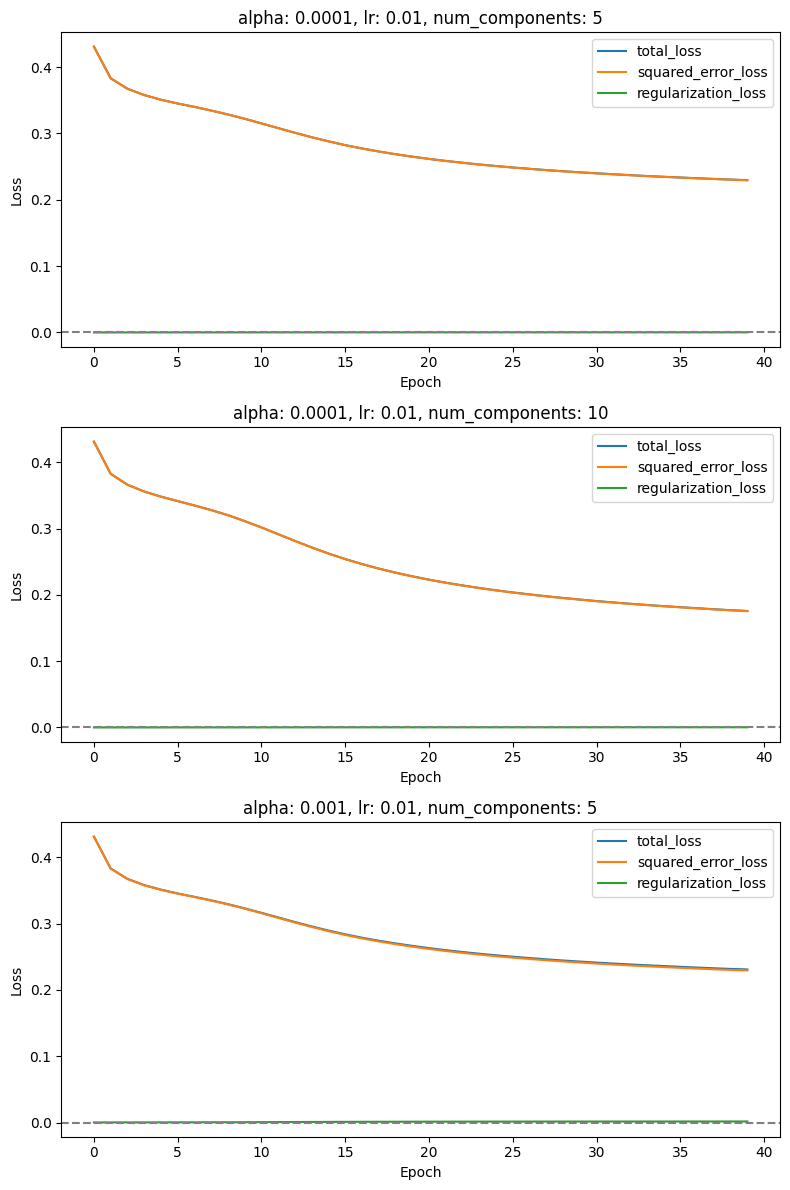

In [10]:
params = [
    {"alpha": 1e-4, "lr": 0.01, "num_components": 5, "num_epochs": 40},
    {"alpha": 1e-4, "lr": 0.01, "num_components": 10, "num_epochs": 40},
    {"alpha": 1e-3, "lr": 0.01, "num_components": 5, "num_epochs": 40},
]

fig, axes = plt.subplots(nrows=3, figsize=(8, 12))   

for i, param in enumerate(params):
# plot total_loss, squared_error_loss, regularization_loss
    model = SparseMatrixFactorization(**param)
    model.fit(ratings_matrix)
    
    df = pd.DataFrame(model.epoch_end_cost_, columns=["total_loss", "squared_error_loss", "regularization_loss"])
    df.index.name = 'epoch'
    df = df.reset_index()
    
    sns.lineplot(data=df, x='epoch', y='total_loss', ax=axes[i], label='total_loss')
    sns.lineplot(data=df, x='epoch', y='squared_error_loss', ax=axes[i], label='squared_error_loss')
    sns.lineplot(data=df, x='epoch', y='regularization_loss', ax=axes[i], label='regularization_loss')
    axes[i].axhline(y=0, color='gray', linestyle='--')
    
    axes[i].set_title(f"alpha: {param['alpha']}, lr: {param['lr']}, num_components: {param['num_components']}")
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Loss')
    axes[i].legend()
    
plt.tight_layout()
plt.show()
    

### Aufgabe 2d

Diskutiere die Grafiken. Interpretiere die Unterschiede bezüglich der unterschiedlichen Hyper-Parameter.

1. Anzahl Latent-Faktoren: Latent-Faktoren beeinflussen die Modellkomplexität, höhere Faktoren lassen die Daten flexibler modellieren, können aber auch zu Overfitting führen. Man erkennt hier bei dem Faktor 10, dass der squared error loss etwas schneller sinkt.

2. Regularisierung: Die Regularisierung bewirkt, dass die Gewichte nicht zu gross werden. Ein zu grosses $\lambda$ kann dazu führen, dass das Modell zu stark vereinfacht wird und zu Underfitting führt. Ein zu kleines $\lambda$ kann zu Overfitting führen. Die Regularisierungsloss sind bei 40 Epochen jedoch kaum sichtbar, steigen aber bei einem alpha von 0.001 etwas schneller an (erkennt man jedoch nur an den print statements).

## Aufgabe 3 (6 Punkte)

In dieser Aufgabe versuchen wir ein möglichst gutes Modell zu finden.


Du wirst dazu einen zufällig generierten Train-Test Split erstellen. Dabei soll immer genau ein zufällig ausgewähltes Rating pro User dem Test-Split zugeordnet werden, wobei die anderen Ratings dieses Users im Train-Split bleiben. Verwende dazu die Funktion `leave_one_out_split`.

In [11]:
def leave_one_out_split(X: np.ndarray, random_seed=123) -> Tuple[np.ndarray, np.ndarray]:
    """Split dataset by randomly assigning one element of each row to test, the others to train.
    
        Args:
            X: Ratings-Matrix [num_users, num_items]
            random_seed: for reproducibility

        Returns:
            Tuple(Xtrain [num_users, num_items], Xtest[num_users, num_items])
    """
    X_test = np.zeros_like(X)
    X_train = X.copy()
    
    random_state = np.random.RandomState(random_seed)

    for user_row in range(X.shape[0]):
        non_zero = X[user_row, :].nonzero()[0]
        item_col = random_state.choice(non_zero)
        X_test[user_row, item_col] = X[user_row, item_col]
        X_train[user_row, item_col] = 0

    return X_train, X_test

# X_train, X_test = leave_one_out_split(ratings)

# assert np.bincount(X_test.nonzero()[0]).max() == 1, \
#     "Each row (user) must have exactly 1 non-zero rating"

# assert all((ratings > 0).sum(axis=1) - (X_train > 0).sum(axis=1)) == 1, \
#     "Each user has exactly one rating less in the training set as compared to the full set"
        

### Aufgabe 3a

Vergleiche mehrere Hyper-Parameter miteinander. Selektiere das beste Modell gemäss _Mean Absolute Error_ (MAE) mit einem geeigneten Verfahren. Verwende dazu die Funktion `leave_one_out_split`.

In [12]:
import numpy as np
from typing import Tuple

X_train, X_test = leave_one_out_split(ratings_matrix)

# Parameter
alphas = [0.001, 0.01, 0.1]
lrs = [0.005, 0.01, 0.05]
num_components_list = [5, 10]

# besten MAE 
best_mae = np.inf
best_params = None
best_model = None

for alpha in alphas:
    for lr in lrs:
        for num_components in num_components_list:
            # Modellinstanz mit den jeweiligen Hyperparametern
            model = SparseMatrixFactorization(
                alpha=alpha,
                lr=lr,
                num_components=num_components,
                num_epochs=10,
                random_seed=123,
                verbose=False
            )

            # Modell trainieren
            model.fit(X_train)
            preds = model.predict()

            # Berechne den MAE auf den bekannten Test-Bewertungen
            mask = X_test > 0
            if np.sum(mask) == 0:
                continue

            mae = model.compute_mae(X_test)

            print(f"Alpha: {alpha}, LR: {lr}, Components: {num_components}, MAE: {mae:.4f}")

            # Vergleich mit bisher bestem Modell
            if mae < best_mae:
                best_mae = mae
                best_params = (alpha, lr, num_components)
                best_model = model

# Ergebnisse ausgeben
print(f"Bestes Modell: Alpha={best_params[0]}, LR={best_params[1]}, Components={best_params[2]} mit MAE={best_mae:.4f}")


Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

SparseMatrixFactorization(alpha=0.001, lr=0.005, num_components=5,
                          num_epochs=10, verbose=False)

Alpha: 0.001, LR: 0.005, Components: 5, MAE: 0.7122


Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

SparseMatrixFactorization(alpha=0.001, lr=0.005, num_components=10,
                          num_epochs=10, verbose=False)

Alpha: 0.001, LR: 0.005, Components: 10, MAE: 0.7103


Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

SparseMatrixFactorization(alpha=0.001, lr=0.01, num_components=5, num_epochs=10,
                          verbose=False)

Alpha: 0.001, LR: 0.01, Components: 5, MAE: 0.7100


Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

SparseMatrixFactorization(alpha=0.001, lr=0.01, num_components=10,
                          num_epochs=10, verbose=False)

Alpha: 0.001, LR: 0.01, Components: 10, MAE: 0.7058


Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

SparseMatrixFactorization(alpha=0.001, lr=0.05, num_components=5, num_epochs=10,
                          verbose=False)

Alpha: 0.001, LR: 0.05, Components: 5, MAE: 0.6987


Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

SparseMatrixFactorization(alpha=0.001, lr=0.05, num_components=10,
                          num_epochs=10, verbose=False)

Alpha: 0.001, LR: 0.05, Components: 10, MAE: 0.7191


Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

SparseMatrixFactorization(alpha=0.01, lr=0.005, num_components=5, num_epochs=10,
                          verbose=False)

Alpha: 0.01, LR: 0.005, Components: 5, MAE: 0.7108


Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

SparseMatrixFactorization(alpha=0.01, lr=0.005, num_components=10,
                          num_epochs=10, verbose=False)

Alpha: 0.01, LR: 0.005, Components: 10, MAE: 0.7114


Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

SparseMatrixFactorization(alpha=0.01, lr=0.01, num_components=5, num_epochs=10,
                          verbose=False)

Alpha: 0.01, LR: 0.01, Components: 5, MAE: 0.7076


Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

SparseMatrixFactorization(alpha=0.01, lr=0.01, num_components=10, num_epochs=10,
                          verbose=False)

Alpha: 0.01, LR: 0.01, Components: 10, MAE: 0.7068


Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

SparseMatrixFactorization(alpha=0.01, lr=0.05, num_components=5, num_epochs=10,
                          verbose=False)

Alpha: 0.01, LR: 0.05, Components: 5, MAE: 0.7121


Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

SparseMatrixFactorization(alpha=0.01, lr=0.05, num_components=10, num_epochs=10,
                          verbose=False)

Alpha: 0.01, LR: 0.05, Components: 10, MAE: 0.7169


Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

SparseMatrixFactorization(alpha=0.1, lr=0.005, num_components=5, num_epochs=10,
                          verbose=False)

Alpha: 0.1, LR: 0.005, Components: 5, MAE: 0.7117


Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

SparseMatrixFactorization(alpha=0.1, lr=0.005, num_components=10, num_epochs=10,
                          verbose=False)

Alpha: 0.1, LR: 0.005, Components: 10, MAE: 0.7115


Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

SparseMatrixFactorization(alpha=0.1, lr=0.01, num_components=5, num_epochs=10,
                          verbose=False)

Alpha: 0.1, LR: 0.01, Components: 5, MAE: 0.7091


Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

SparseMatrixFactorization(alpha=0.1, lr=0.01, num_components=10, num_epochs=10,
                          verbose=False)

Alpha: 0.1, LR: 0.01, Components: 10, MAE: 0.7107


Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

SparseMatrixFactorization(alpha=0.1, lr=0.05, num_components=5, num_epochs=10,
                          verbose=False)

Alpha: 0.1, LR: 0.05, Components: 5, MAE: 0.6971


Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

SparseMatrixFactorization(alpha=0.1, lr=0.05, num_components=10, num_epochs=10,
                          verbose=False)

Alpha: 0.1, LR: 0.05, Components: 10, MAE: 0.6901
Bestes Modell: Alpha=0.1, LR=0.05, Components=10 mit MAE=0.6901


## Aufgabe 4 (5 Punkte)

In dieser Aufgabe versuchen wir die Qualität der Recommendations qualitativ zu beurteilen.

### Aufgabe 4a

Erstelle Empfehlungen (z.B. Top-5 predicted Ratings) für die ersten 3 User in der Ratings-Matrix mit deinem besten Modell und versuche die Empfehlungen ganz grob qualitativ zu beurteilen.

In [13]:
# 1) Vom Modell vorhergesagte Matrix abrufen
predictions = best_model.predict() 

# Top-k Items pro User ermitteln
k = 5
num_users = predictions.shape[0]

# Zufällig 3 User auswählen
random_users = np.random.choice(num_users, 3, replace=False)

for user_idx in random_users:
    # Alle vorhergesagten Ratings für user_idx
    user_pred_ratings = predictions[user_idx, :]  

    # Die Indizes der Top-k vorhergesagten Filme
    top_k_indices = np.argsort(-user_pred_ratings)[:k]  # Sortierung absteigend

    print(f"\nEmpfehlungen für UserIndex={user_idx} (Top-{k}):")
    for rank, movie_col_idx in enumerate(top_k_indices, start=1):
        movie_id = map_col_id_to_movie[movie_col_idx]
        title_row = movies[movies['movieId'] == movie_id]
        if not title_row.empty:
            movie_title = title_row.iloc[0]['title']
        else:
            movie_title = f"Unbekannt (movieId={movie_id})"
        
        predicted_score = user_pred_ratings[movie_col_idx]
        print(f"   {rank}. {movie_title} (predicted rating = {predicted_score:.2f})")



Empfehlungen für UserIndex=423 (Top-5):
   1. The Day of the Doctor (predicted rating = 4.44)
   2. Man Bites Dog (predicted rating = 4.34)
   3. Last Tango in Paris (predicted rating = 4.34)
   4. Captain Fantastic (predicted rating = 4.31)
   5. Guess Who's Coming to Dinner (predicted rating = 4.30)

Empfehlungen für UserIndex=365 (Top-5):
   1. Three Billboards Outside Ebbing, Missouri (predicted rating = 4.72)
   2. Man Bites Dog (predicted rating = 4.65)
   3. Guess Who's Coming to Dinner (predicted rating = 4.64)
   4. The Trial (predicted rating = 4.63)
   5. Swept Away (predicted rating = 4.62)

Empfehlungen für UserIndex=98 (Top-5):
   1. Three Billboards Outside Ebbing, Missouri (predicted rating = 5.25)
   2. The Trial (predicted rating = 5.24)
   3. Captain Fantastic (predicted rating = 5.22)
   4. Guess Who's Coming to Dinner (predicted rating = 5.22)
   5. Swept Away (predicted rating = 5.22)


### Aufgabe 4b

Was hältst du von den Empfehlungen? Was ist dein Gesamteindruck vom Projekt? Gib Daniele Feedback zu deinen Erkenntnissen.

Bei einigen Usern sind die vorhergesagten Bewertungen durchweg sehr hoch (über 5). Das kann verschiedene Gründe haben. Möglicherweise haben diese User sehr viele Filme bewertet, sodass das Modell „sicher“ ist, dass er diese Filme mögen wird. Eine andere Möglichkeit ist, dass sie im Durchschnitt ohnehin sehr hohe Bewertungen vergibt und das Modell dies entsprechend in den Latent-Faktoren abbildet.

Bei anderen hingegen fallen die prognostizierten Ratings deutlich niedriger aus. Eventuell haben diese User nur wenige Filme bewertet, wodurch das Modell unsicherer ist, was seine tatsächlichen Vorlieben angeht. Alternativ könnten diese besonders streng bewerten, was sich ebenfalls auf die Vorhersagen auswirkt.

Spannend ist, dass manche Filme gleich mehreren Usern empfohlen werden. Das kann darauf hindeuten, dass es sich entweder um allgemein sehr beliebte Filme handelt (in vielen Profilen positiv bewertet) oder dass das Modell diese Titel aus seinen Latent-Faktoren als „besonders gut“ einschätzt und sie deshalb an viele Nutzer empfiehlt.

Insgesamt kommt hier ein relativ einfaches Matrix-Faktorisierungs-Modell zum Einsatz, das basierend auf den vorhandenen Daten schon recht gute Empfehlungen liefert. Es gibt natürlich komplexere Recommender-Systeme, die durch mehr Features (z. B. Genre-Informationen, Deep-Learning-Ansätze etc.) noch genauere Vorschläge generieren könnten. Dennoch ist es beachtlich, dass bereits dieses simpler aufgebaute Modell bemerkenswert sinnvolle nutzerbasierte Empfehlungen erzeugt.

Spannend wäre es, dass Modell zu erweitern basierend auf das Genre der Filme oder auch auf die Schauspieler. Das könnte die Empfehlungen noch genauer machen.

## Aufgabe 5 (7 Punkte)

Collaborative Filtering (CF) ist eine Unsupervised Learning-Methode.

Vergleiche CF mit NMF und K-Means, insbesondere auch hinsichtlich der meist verwendeten Optimierungsverfahren.

Welche der beiden Methoden könntest du auch für ein Recommender System einsetzen?  
Wie genau? Beschreibe ein mögliches Vorgehen inklusive Formulierung des Modellierungsansatzes.

1. CF: Collaberative Filtering ist ein Unsupervised Learning Ansatz, der darauf basiert, dass Nutzer, die ähnliche Filme mögen, auch ähnliche Präferenzen haben. Dabei werden die "Lücken" in den Matrizen aufegfüllt und mit den tatsächlichen Werten verglichen. Das Modell basiert auf den Ratings der Nutzer und den Filmen. Es gibt zwei Ansätze: User-based CF und Item-based CF. User-based CF vergleicht die Nutzer untereinander, Item-based CF vergleicht die Filme untereinander.

2. NMF: Non-negative Matrix Factorization ist ein Unsupervised Learning Ansatz, der eine Matrix in zwei Matrizen zerlegt, die nur nicht-negative Werte enthalten (wie bei Bildern oder Audios, da wir hier keine negativen Werte haben). NMF wird oft für Topic Modeling verwendet, kann aber auch für Recommender Systeme eingesetzt werden, um Muster in Bewertungen zu finden. Hierbei wird die Rating-Matrix in zwei Matrizen zerlegt, die User- und Item-Faktoren repräsentieren. Jedoch hat es Schwierigkeiten mit nicht-linearen Daten (hat man jedoch bei Filmeratings häufig), da es auf einer linearen Modellierung basiert.

3. K-Means: K-Means ist ein Clustering-Algorithmus, der die Daten in k Gruppen einteilt. Dabei werden sogenannte Clusterzentren random erstellt und die Summer der quadratischen Abstände zu den Clustern minimiert, sodass die Daten möglichst nah an den Clusterzentren leigt. Hat man viele Cluster kann es zu Overfitting führen. K-Means kann für Recommender Systeme verwendet werden, um Nutzer oder Filme in Gruppen einzuteilen. Die Gruppen können dann genutzt werden, um Empfehlungen zu generieren, jedoch ist K-Means nicht so gut geeignet wie CF, da es keine Faktorisierung der Daten vornimmt.

K-Means Modelierungsansatz:

1. Anzahl der Cluster k wählen und die Clusterzentren initilaisieren.

2. Distanz zwischen jedem Datenpunkt und den Clusterzentren berechnen mit der Formel $d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$.

3. Jedem Datenpunkt den Cluster zuweisen, dessen Clusterzentrum am nächsten ist mit der Formel $argmin_{y \in Y} d(x, y)$.

4. Berechne die neuen Clusterzentren, indem der Mittelpunkt der Datenpunkte in jedem Cluster berechnet wird mit der Formel $c_i = \frac{1}{|C_i|} \sum_{x \in C_i} x$.

5. Schritte wiederholen, bis die Clusterzentren nicht mehr verändert werden.

